# Capstone Project:

** Pual Hicks, Francisco Estrada, Jay Hombal**

## Overview:
Today, Humanity is facing unprecedented challenge of global warming because of man made greenhouse gas (CHG) emissions. Both developed and developing nations around the world have come together to fight this existential threat to Humanity. The Climate change is a major target for the Biden administration (and other countries).

Many startup companies (Pachama, Indigo, ClimateCorp) backed by major investors are starting to work in this area. California has started its cap-and-trade program since 2013. This project aims at using high resolution remote sensing datasets to create carbon stock maps for a wide range of forests in the United States.

The adoption of renewable sources of energy (zero carbon), carbon capture and storage (CCS) and Carbon offsetting are some of the options to address climate change. The carbon credits, aka carbon offset schemes, is a voluntary form of carbon pricing, allows individuals and companies to invest in environmental projects worldwide to compensate for the greenhouse gas(GHG) emissions they produce by investing in renewable energy sources or reducing (such as reforestation) GHG emissions. The Carbon credits markets aim at reducing the emission of greenhouse gases, and allow
emitters to offset their emission by purchasing carbon credits.

Forests are a significant player in absorbing carbon dioxide (photosynthesis) and storing CO2 in their wood tissues (biomass). Accurate quantification of how much carbon forest stores is essential to the success of the carbon market.

## Problem Definition:
Our main goal is to develop a predictive model to estimate biomass for tree species in a wide variety of forest types to serve as the foundation for awarding carbon credit to individual entities (states, corporations, organizations, individual global citizens, etc.). The purpose is to provide a scientific, validated basis for the credit determinations that can be numerically assigned from the biomass estimates to carbon credits in a dynamical carbon market.  

## Data:

__1. What is the format of your data?__
     
The the source dataset includes  __csv files__ for 2018 SCBI Forest-GEO ground-level data and 2019 National Ecological Observatory Network’s(NEON), Airborne Observatory Program (AOP) Lidar Data, from which we create an aggregate dataset.


__SCBI Forest-Geo 2018 Census Data__

The Smithsonian Conservation Biology Institute (SCBI) large forest dynamics plot is located at the Smithsonian’s National Zoo and Conservation Biology Institute in Front Royal, VA, adjacent to the northern end of Shenandoah National Park. The plot is located at the intersection of three of the major physiographic provinces of the eastern US: the Blue Ridge, Ridge and Valley, and Piedmont provinces. The forest type is typical mature secondary eastern mixed deciduous forest, with a canopy dominated by tulip poplar (Liriodendron tulipifera), oaks (Quercus spp.), and hickories (Carya spp.), and an understory composed mainly of spicebush (Lindera benzoin), paw-paw (Asimina triloba), American hornbeam (Carpinus caroliniana), and witch hazel (Hamamelis virginiana).  

The SCBI forest plot is 25.6 ha (640 x 400 m), including a 4-ha fenced exclosure where white-tailed deer have been excluded since 1990, as well as three 1-ha Smithsonian Monitoring and Assessment of Biodiversity Program (SI-MAB) sites, with some sites surveyed several times since 1990.  Initial tree tagging and measurement of the full ForestGEO plot occurred in 2008, and the installation finished in 2009. Recensuses have occurred in 2013 and 2018. In 2008, there were 40,411 stems ≥1 cm dbh, representing 62 species, 38 genera and 28 families. In addition, 7 species of woody vines and ca.250 species of herbaceous plants have been identified. 

The census 3 (2018) at SCBI data have been checked and corrected after a tree survey is finished in a ForestGEO plot.

**Reference:** \url{https://github.com/SCBI-ForestGEO/SCBI-ForestGEO-Data/tree/master/tree_main_census}


__The 2019 Neon Crown dataset__ 

The 2019 NeonTreeCrowns dataset is a set of individual level crown estimates for each rectangular bounding box crown prediction includes height, crown area, and spatial location of trees at the site SCBI.
This data is surveyed by the National Ecological Observation Network’s Airborne Observation Platform. 

The predictions are also available as a single csv for each file. All available tiles for that site and year are combined into one large site. These data are not projected, but contain the utm coordinates for each bounding box (left, bottom, right, top). For both file types the following fields are available:

**Reference:** \url{https://zenodo.org/record/3765872#.YPygfXVKgUF}

---

__2. What is the unit of observation? What component of the data indicates the source of a given observation?__

In the 2018 SCBI census dataset, the __unit of observation uniquely identifies a tree and tree stems__. And each tree has a diameter at the breast height, species, height of measurement, 
status, UTM, latitude, and longitudes features are captured.

In the 2019 Neon Crown dataset, the __unit of observation is also a tree__. And each tree has features such as bounding box UTM coordinates, area, height, score, and the geo_index of the plot since the Noen dataset is Lidar data measured from the National Ecological Observation Network’s Airborne Observation Platform.

__3. What are the features in your data?__

The following section captures the data types (metadata) for each feature/field in the 2018 and 2019 datasets.

__MetaData__

Field |Description |Units/Format
-----|-----|----- 
treeID|Unique Tree identifier in CTFS Database (useful for matching trees)|Int
stemID|Unique Tree identifier in CTFS Database (useful for matching stems)|Int
tag|Unique tree identifier number corresponding to a metal tag of a given tree within the ForestGEO plot|Int
stemtag|The number of the stem, if present|Int
sp|The species mnemonic|string
dbh|Diameter at breast height as ForestGEO census 2013|cm
hom|The height of measure|Numeric
ExactDate|Date of observation|MM/DD/YEAR
status| The tree status, A- alive, D-dead, G-lost_stem, mission or prior|string
codes| codes for measurement as recorded in the field (census codes)|string
NAD83_X|Tree loc data - NAD UTM X Coodrinate|meters
NAD83_Y|Tree loc data - NAD UTM Y Coodrinate|meters
lat|Tree loc data - latitude|degree
long|Tree loc data - longitude|degree

__Tree 'census' codes__

Field |Description 
-----|-----
B| Large Buttress, used ladder to measure
M| Multiple Stems
A| pom at alternate height
I| Irregular step
P| Any problem require further attention
L| Stem leaning
Q| Stem broken above breast height
X| Stem broken below breast height
C| pom has changed
Y| prostrate stem
R| Main stem broken, resprout
DS| Dead, stem standing
DC| Dead, stem broken
DT| Dead, tag only found
DN| presumed Dead

__NEON 2019 Lidar Data__


Field |Description |Units/Format
-----|-----|----- 
left| The left UTM X coordinate of the bounding box| meters
bottom| The bottom UTM Y coordinate of the bounding box| meters
right |The Top UTM X coordinate of the bounding box| meters
top|The Top UTM Y coordinate of the bounding box| meters
Height|The Crown height is defined as the 99th quartile of all canopy height pixels from a LiDAR height model (ID: DP3.30015.001)| meters
Area|The crown area- the rectangular bounding box|m2
Label|All data in this release are "Tree"|string
Score|The confidence score from the DeepForest deep learning algorithm. The score ranges from 0 (low confidence) to 1 (high confidence)|percent
geo_index|plot UTM geo_index|string


* We are reading only the features applicable to the project for memory effeciency.

__4. Where is the data being stored?__

We download the source data is online at these links -

1. 2019 SCBI Census Dataset: \url{https://raw.githubusercontent.com/SCBI-ForestGEO/SCBI-ForestGEO-Data/master/spatial_data/UTM%20coordinates/scbi_stem_utm_lat_long_2018.csv}

2. 2019 Neon Crown Dataset: \url{https://zenodo.org/record/3765872/files/SCBI_2019.csv?download=1}

We download the dataset directly from the above-noted HTTP links. Both data sources are cleansed, filtered, and analyzed before creating the final_ __merged_2018_2019_scbi.csv__ file.   

The merged file is stored at \url{https://github.com/mh4ey/capstone}

The merged file contains the significant features used in the computation of Above Ground Biomass (AGG).

__5. How are you working with this data?__

__Cleaning Dataset__

We first cleansed the 2018 dataset to remove dead, broken trees and tree stems. Next, we need to merge the ground-based 2018 SCBI census dataset and the 2019 Neon Crown dataset based on the UTM coordinates 
for the trees in each dataset. 

The 2019 Neon Crown dataset is the aerial dataset and does not have the treeID uniquely identifying the trees.

So, we will use distance-based matching algorithms (Euclidian distance). However, there is significant uncertainty in the matching algorithm. We also know that the small trees measured from the ground are not visible in the aerial dataset, and large tree crowns often cover them.

We will try three different filtering options for the 2018 SCBI census dataset to account for the uncertainty in the matching algorithm.

1. Filter trees less than 10 meters from the 2018 SCBI census dataset before matching with the 2019 Neon crown dataset.
1. Filter trees less than 15 meters from the 2018 SCBI census dataset before matching with the 2019 Neon crown dataset.
1. Filter trees less than 20 meters from the 2018 SCBI census dataset before matching with the 2019 Neon crown dataset.

__Calcuate  Above Ground Biomass (AGB) in Kilograms__

This semester, we only focus on calculating AGB after filtering all trees 10 meters or less from the 2018 SCBI census dataset. We will consider the other two filtering options noted above in the final semester.

Then using the R-library, 'allodb’, we calculate the above-ground biomass in kilograms. 

The feature 'biomass' will be included as the response variable for the model. Aggregating aerial (including LiDAR, hyper-spectral, and camera) and ground-level data will require us to calculate geo-coordinates and merge the tree data from both datasets by latitude and longitude or UTM coordinates using a bounding box.  

__Next Steps in Final Semester__

Using the cleansed dataset, we aim to create ML predictive models to predict above ground Biomass in Kg for the forest site Smithsonian Conservation Biology Institute (SCBI) ForestGEO Data. And then calibrate the model by applying data from few other sites. Finally, we apply the corrected algorithm to other regions in the United States.

In [104]:
import numpy as np
import pandas as pd
from uuid import uuid4

import matplotlib.pyplot as plt
import seaborn as sns
import os
sns.set_context('paper', font_scale=1.4)

%matplotlib inline
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option("precision", 7)

#### Load 2018 Census Data

In [105]:
scbi_2018_filename = 'https://raw.githubusercontent.com/SCBI-ForestGEO/SCBI-ForestGEO-Data/master/spatial_data/UTM%20coordinates/scbi_stem_utm_lat_long_2018.csv'
scbi_census_2018 = pd.read_csv(scbi_2018_filename, usecols=['treeID', 'stemID', 'sp',
       'dbh', 'hom','codes', 'status', 'NAD83_X', 'NAD83_Y', 'lat', 'lon'])

__Rename Columns__

In [106]:
scbi_census_2018_columns = {
    'treeID' : 'tree_id', 
    'stemID': 'stem_id', 
    'sp': 'species',
    'dbh': 'stem_diameter', 
    'hom': 'point_of_measure', 
    'codes': 'census_codes', 
    'status' : 'tree_status', 
    'NAD83_X' : 'UTM_2018_X', 
    'NAD83_Y': 'UTM_2018_Y', 
    'lat': 'latitude', 
    'lon': 'longitude'
}

# sub select only columns we are interested in
scbi_2018 = scbi_census_2018.rename(columns=scbi_census_2018_columns)

In [107]:
scbi_2018.head()

,tree_id,stem_id,species,stem_diameter,point_of_measure,census_codes,tree_status,UTM_2018_X,UTM_2018_Y,latitude,longitude
0,1,1,libe,65.0,1.3,M,A,747387.5264559,4.3085795e+06,38.8912770,-78.1476714
1,2,2,libe,21.0,1.3,M,A,747401.4499056,4.3085657e+06,38.8911491,-78.1475160
2,3,3,libe,32.0,1.3,DS,G,747389.9459971,4.3087037e+06,38.8923941,-78.1475988
3,4,4,nysy,142.0,1.3,M,A,747389.7762816,4.3089352e+06,38.8944773,-78.1475173
4,5,5,havi,96.0,1.3,M;P,A,747384.7942993,4.3089429e+06,38.8945488,-78.1475719


In [108]:
scbi_2018.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72555 entries, 0 to 72554
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   tree_id           72555 non-null  int64  
 1   stem_id           72555 non-null  int64  
 2   species           72555 non-null  object 
 3   stem_diameter     54367 non-null  float64
 4   point_of_measure  54369 non-null  float64
 5   census_codes      56163 non-null  object 
 6   tree_status       72555 non-null  object 
 7   UTM_2018_X        72555 non-null  float64
 8   UTM_2018_Y        72555 non-null  float64
 9   latitude          72555 non-null  float64
 10  longitude         72555 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 6.1+ MB


__Observation:__

__3.1 How many observations do you have? There might be multiple types of observations in your dataset?__

The 2018 SCBI census ground data has 72555 observations and when loaded into jupyter notebook the pandas dataframe memory usage is about 6.1 MB

In [109]:
scbi_2018.isna().sum()

tree_id                 0
stem_id                 0
species                 0
stem_diameter       18188
point_of_measure    18186
census_codes        16392
tree_status             0
UTM_2018_X              0
UTM_2018_Y              0
latitude                0
longitude               0
dtype: int64

__Observation:__
The __stem_diamter, point of measure, tree_status, and census_code__ features have missing values.

For this study we choose to drop all rows where these features are missing values.

In [110]:
scbi_2018 = scbi_2018.dropna()

__Data Prepration:__

The __tree_status, species and tree_status_codes__ are __categorical __ features__. So we will convert these features into pandas category type.

In [111]:
scbi_2018[['tree_status']].assign(DFstatus=scbi_2018['tree_status'].astype('category'))
scbi_2018[['species']].assign(sp = scbi_2018['species'].astype('category'))
scbi_2018[['census_codes']].assign(status = scbi_2018['census_codes'].astype('category'))
print("Converted DFstatus, sp and status columns to category")

Converted DFstatus, sp and status columns to category


In [112]:
scbi_2018.describe()

,tree_id,stem_id,stem_diameter,point_of_measure,UTM_2018_X,UTM_2018_Y,latitude,longitude
count,37976.0000000,37976.0000000,37976.0000000,37976.0000000,37976.0000000,3.7976000e+04,37976.0000000,37976.0000000
mean,25329.2788603,42417.1405888,40.7355962,1.2968441,747603.4764391,4.3086435e+06,38.8917921,-78.1451613
std,14765.5761840,20185.2349597,89.7005931,0.0594796,113.4785358,1.3007055e+02,0.0011742,0.0013032
min,1.0000000,1.0000000,10.0000000,0.0000000,747371.9215751,4.3085067e+06,38.8905917,-78.1477164
25%,12368.7500000,25686.2500000,13.0000000,1.3000000,747522.8208859,4.3085533e+06,38.8909734,-78.1460867
50%,26580.0000000,46239.5000000,18.0000000,1.3000000,747614.3949493,4.3086014e+06,38.8914183,-78.1450463
75%,38512.0000000,59109.2500000,28.0000000,1.3000000,747699.5690097,4.3086836e+06,38.8921539,-78.1440627
max,49305.0000000,72550.0000000,1533.0000000,1.8000000,747785.4110242,4.3091552e+06,38.8963784,-78.1430559


#### Load NEON Tree Crowns Dataset

In [113]:
scbi_2019_filename = 'https://zenodo.org/record/3765872/files/SCBI_2019.csv?download=1'
scbi_2019_aop = pd.read_csv(scbi_2019_filename)

We are only interested in UTM coordinates left,bottom,right,top,score,lable,height and geo_index

In [114]:
scbi_2019_aop_columns = ['left', 'bottom', 'right', 'top', 'score',
       'height', 'area', 'geo_index']
scbi_2019 = scbi_2019_aop[scbi_2019_aop_columns]

In [115]:
scbi_2019.head()

,left,bottom,right,top,score,height,area,geo_index
0,749044.0,4304584.5,749053.6,4304594.1,0.8817180,25.3333000,92.16,749000_4304000
1,749273.1,4304013.6,749282.1,4304022.9,0.8794504,21.8160007,83.70,749000_4304000
2,749103.5,4304633.9,749112.2,4304644.4,0.8699396,13.6721999,91.35,749000_4304000
3,749581.1,4304668.6,749590.1,4304679.0,0.8633375,27.0415005,93.60,749000_4304000
4,749863.7,4304220.9,749871.1,4304228.4,0.8571851,4.7500000,55.50,749000_4304000


In [116]:
scbi_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2917297 entries, 0 to 2917296
Data columns (total 8 columns):
 #   Column     Dtype  
---  ------     -----  
 0   left       float64
 1   bottom     float64
 2   right      float64
 3   top        float64
 4   score      float64
 5   height     float64
 6   area       float64
 7   geo_index  object 
dtypes: float64(7), object(1)
memory usage: 178.1+ MB


__Observation:__

__3.2 How many observations do you have? There might be multiple types of observations in your dataset?__

The 2019 NEON Tree Crowns dataset has 2917297 observations and when loaded into jupyter notebook the pandas dataframe memory usage is about 178.1+ MB

In [117]:
scbi_2019.isna().sum()

left         0
bottom       0
right        0
top          0
score        0
height       0
area         0
geo_index    0
dtype: int64

In [118]:
scbi_2019.describe()

,left,bottom,right,top,score,height,area
count,2.9172970e+06,2.9172970e+06,2.9172970e+06,2.9172970e+06,2.9172970e+06,2.9172970e+06,2.9172970e+06
mean,7.4710900e+05,4.3066724e+06,7.4711337e+05,4.3066768e+06,4.0742495e-01,2.0741513e+01,2.2987504e+01
std,2.7997487e+03,2.8079013e+03,2.7996680e+03,2.8078969e+03,1.3593587e-01,8.2084912e+00,2.3723085e+01
min,7.4200000e+05,4.3020000e+06,7.4200120e+05,4.3020011e+06,2.0000005e-01,3.0002000e+00,1.7000000e+00
25%,7.4481170e+05,4.3042200e+06,7.4481660e+05,4.3042247e+06,2.9251879e-01,1.5211500e+01,9.0000000e+00
50%,7.4728330e+05,4.3066191e+06,7.4728760e+05,4.3066238e+06,3.9614928e-01,2.1150500e+01,1.4760000e+01
75%,7.4940410e+05,4.3090427e+06,7.4940840e+05,4.3090475e+06,5.0443709e-01,2.6483200e+01,2.6520000e+01
max,7.5199870e+05,4.3119990e+06,7.5200000e+05,4.3120000e+06,9.2989784e-01,7.8994999e+01,3.9123000e+02


---

## Exploratory Data analysis: 

### 2018 SCBI Census Data

In this section we try to discover and visualize the 2018 SCBI census ground data and the 2019 NEON tree crown AOP dataset, to get a general understanding of the data in both the datasets

No handles with labels found to put in legend.


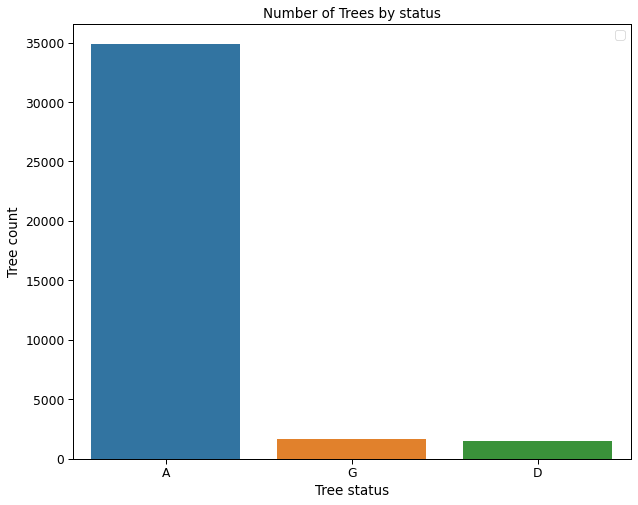

In [119]:
plt.figure(figsize=(10,8))
sns.countplot(data=scbi_2018, x='tree_status')
plt.legend(loc=0)
plt.ylabel('Tree count')
plt.xlabel('Tree status')
plt.title('Number of Trees by status')
print()

__Observation: Dead or broken trees and tree stems__

Following are the valid tree_status values in the SCBI 2018 census dataset.
    **'A'** - **alive**,
    **'D'** - **dead**,
    **'P'** - **Not in Census**,
    **'G'** - **stem is gone**,  
  
__Note:__

Since the primary goal of our project is to create a model to predict the __Above Ground Biomass (AGB)__, we will only consider trees and stems alive and drop all other trees and stems from the dataset.

In [120]:
scbi_2018 = scbi_2018.query("tree_status not in ['D','G']")
scbi_2018[['tree_id','tree_status']]\
    .groupby('tree_status').count()

,tree_id
tree_status,
A,34859


__Observation: The tree_census_codes feature identifies additional trees that are either dead or broken__

So we drop any tree or stem with 'dead above 1.3m', 'dead standing', 'stem fallen', 'dead only tag found' and 'presumed dead' codes

In [121]:

SCBI_STATUS_CODES = {
    'A' : 'alternate POM (point of measure differnt than 1.3)',
    'B' : 'stem broken above 1.3m',
    'C' : 'dead above 1.3m',
    'F' : 'inside deer fence',
    'G' : 'ID to Genius certian',
    'I' : 'stem irrigular where measured',
    'J' : 'bent',
    'L' : 'leaning stem',
    'M' : 'Multiple stem plant',
    'X' : 'stem broken below 1.3 m',
    'P' : 'prostrate stem (allmost parallel to the ground)',
    'S' : 'secondary stem',
    'TR' : 'tag removed',
    'WR' : 'wire removed',
    'DS' : 'dead stem standing',
    'DC' : 'dead stem fallen',
    'DT' : 'dead only tag found',
    'DN' : 'presumed dead no tag or stem',
    'main' : 'main stem',  
}

Let us examine if the 2018 SCBI census dataset has the census codes that mark the tree observation as either dead or broken.

In [122]:
dead_tree_or_stem_census_codes = ['B','C', 'X' 'DS*', 'DC','DT', 'DN']

In [123]:
scbi_2018['census_codes'].isin(dead_tree_or_stem_census_codes).value_counts()

False    34771
True        88
Name: census_codes, dtype: int64

In [124]:
scbi_2018[scbi_2018['census_codes'].isin(dead_tree_or_stem_census_codes)].sample(10)

,tree_id,stem_id,species,stem_diameter,point_of_measure,census_codes,tree_status,UTM_2018_X,UTM_2018_Y,latitude,longitude
1415,1416,1416,caca,101.0,1.3,B,A,747394.0475885,4.3086649e+06,38.8920436,-78.1475655
15019,15020,15020,nysy,81.0,1.3,B,A,747576.4745831,4.3089805e+06,38.8948328,-78.1453508
50340,36516,50341,libe,11.0,1.3,C,A,747748.6037134,4.3085890e+06,38.8912606,-78.1435096
21157,21158,21158,nysy,196.0,1.3,B,A,747666.8316856,4.3086127e+06,38.8914970,-78.1444428
6946,6947,6947,cato,210.0,1.3,B,A,747471.1952820,4.3091034e+06,38.8959686,-78.1465190
30572,30573,30573,astr,42.0,1.3,B,A,747766.0104994,4.3090027e+06,38.8949793,-78.1431599
61429,40407,61430,astr,14.0,1.3,B,A,747579.3479047,4.3088351e+06,38.8935236,-78.1453701
27034,27035,27035,astr,26.0,1.3,B,A,747729.4981091,4.3089295e+06,38.8943310,-78.1436068
48971,35443,48972,libe,10.0,1.3,C,A,747739.9914700,4.3085765e+06,38.8911505,-78.1436133
1526,1527,1527,caca,90.0,1.3,B,A,747384.2781803,4.3087583e+06,38.8928869,-78.1476444


__Observation:__ Even after deleting dead trees, we see tree data with codes that are not relevant for us in calculating __Above Ground Biomass__.   
So we will be dropping these additional 88 rows from the dataset.

In [125]:
scbi_2018 = scbi_2018[~scbi_2018['census_codes'].isin(dead_tree_or_stem_census_codes)]
scbi_2018['census_codes'].isin(dead_tree_or_stem_census_codes).value_counts()

False    34771
Name: census_codes, dtype: int64

__Observation:__ Tree count by species

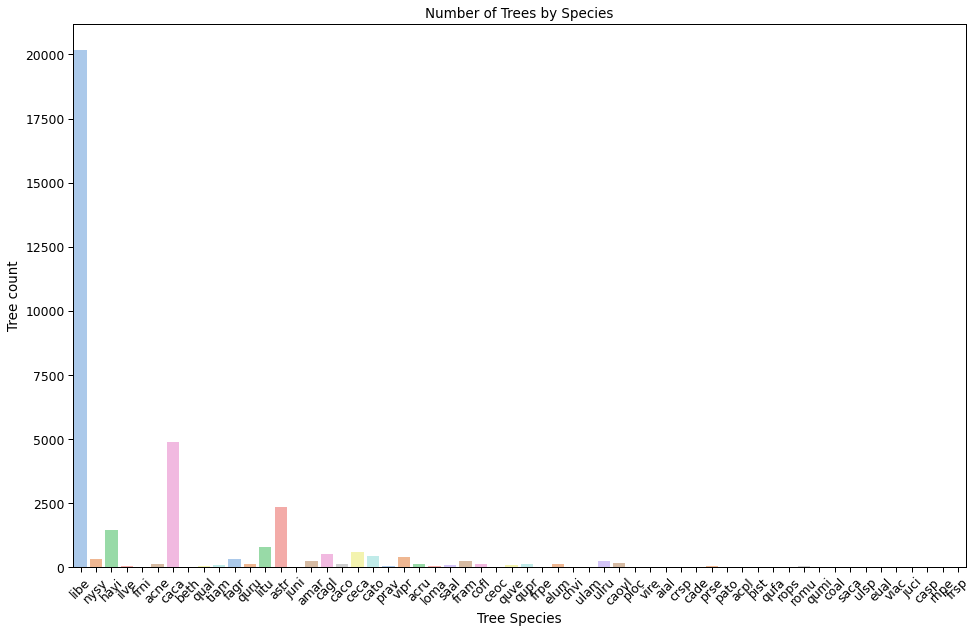

In [126]:
plt.figure(figsize=(16,10))
count_plot = sns.countplot(data=scbi_2018, x='species', palette='pastel')
count_plot.set_xticklabels(labels=count_plot.get_xticklabels(), rotation=45)
plt.ylabel('Tree count')
plt.xlabel('Tree Species')
plt.title('Number of Trees by Species')
plt.show()

__observation:__ We see from the above plot that there are many species with less than 100 trees.

__observation:__ Imbalanced dataset

As we can see from the above count plot, the scbi 2018 census dataset is imbalanced. We need to address the data imbalance when creating train and test datasets

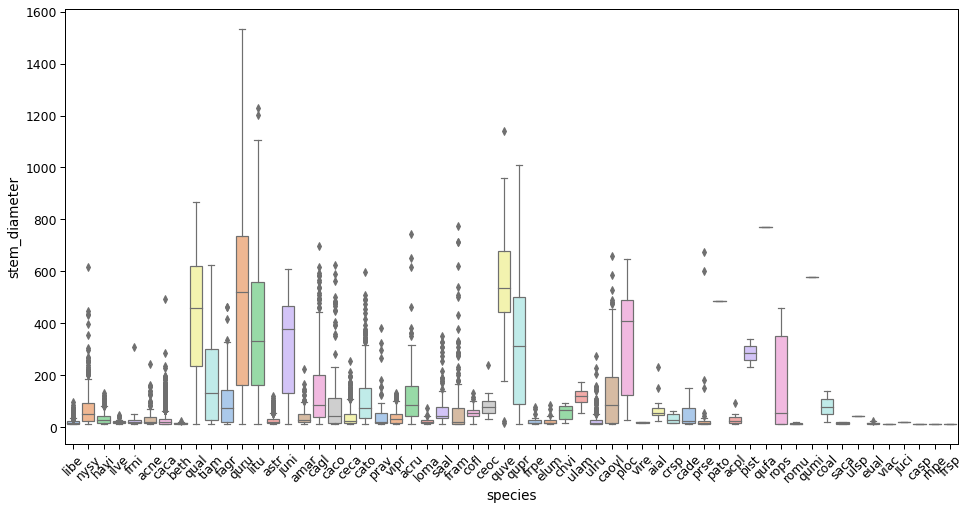

In [127]:
plt.figure(figsize=(16,8))
box_plot = sns.boxplot(x='species', y='stem_diameter', data=scbi_2018, palette='pastel')
box_plot.set_xticklabels(labels=box_plot.get_xticklabels(), rotation=45)
plt.show()


__Observation: Stem diameter measurements vary significantly across species__

__Number of unique trees in SCBI census dataset:__

In [128]:
scbi_2018.tree_id.nunique()

21666

In [129]:
scbi_2018.shape

(34771, 11)

__How many trees haves more than one stem?__

In [130]:
tree_stems = scbi_2018[['tree_id', 'stem_id']]\
    .groupby('tree_id')\
    .count()\
    .query('stem_id == 1')\
    .sort_values(by='stem_id', ascending=False)

In [131]:
tree_stems_gt1 = scbi_2018[['tree_id', 'stem_id']]\
    .groupby('tree_id')\
    .count()\
    .query('stem_id > 1')\
    .sort_values(by='stem_id', ascending=False)

In [132]:
print(f'{tree_stems_gt1.shape[0]} trees have more than one stems')
print(f'{tree_stems.shape[0]} trees have only one stems')

8051 trees have more than one stems
13615 trees have only one stems


### NEON Tree Crown Dataset


In [133]:
scbi_2019.head()

,left,bottom,right,top,score,height,area,geo_index
0,749044.0,4304584.5,749053.6,4304594.1,0.8817180,25.3333000,92.16,749000_4304000
1,749273.1,4304013.6,749282.1,4304022.9,0.8794504,21.8160007,83.70,749000_4304000
2,749103.5,4304633.9,749112.2,4304644.4,0.8699396,13.6721999,91.35,749000_4304000
3,749581.1,4304668.6,749590.1,4304679.0,0.8633375,27.0415005,93.60,749000_4304000
4,749863.7,4304220.9,749871.1,4304228.4,0.8571851,4.7500000,55.50,749000_4304000


__How many trees exist by geo_index in 2019 dataset?__

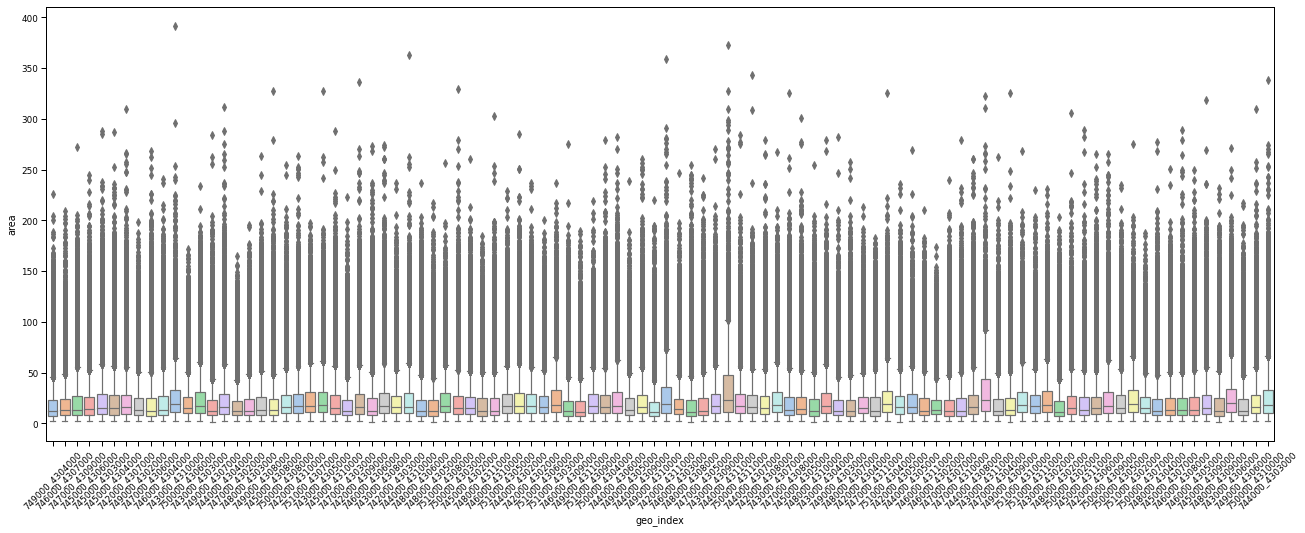

In [134]:
sns.set_context('paper', font_scale=1.0)
plt.figure(figsize=(22,8))
box_plot = sns.boxplot(x='geo_index', y='area', data=scbi_2019, palette='pastel')
box_plot.set_xticklabels(labels=box_plot.get_xticklabels(), rotation=45)
plt.show()

## Feature Engineering 

For matching Trees from 2018 and 2019 dataset -

The SCBI 2018 dataset has the UTM coordirnates __2018_UTM_X__ and __2018_UTM_Y__ as the North American Datum (NAD) is the horizontal datum now used to define the geodetic network in North America.

Reference:https://en.wikipedia.org/wiki/North_American_Datum  
          https://geodesy.noaa.gov/datums/horizontal/north-american-datum-1983.shtml
          
__Create a geo_index_feature in SCBI 2018 dataset based on the UTM coordinates__

The 2018 census dataset has data for two geo_index plots. So we will filter the 2019 dataset by the 2018 census dataset geo_index plots. 

In [135]:
def subX(x):
    return str(x)[0:3] +'000'
def subY(y):
    return str(y)[0:4] +'000'
scbi_2018 = scbi_2018.assign(geo_index = scbi_2018['UTM_2018_X'].apply(subX) + '_' + scbi_2018['UTM_2018_Y'].apply(subY))

#count rows by geo_index
scbi_geo = scbi_2018[['tree_id','geo_index']]\
     .rename(columns = {'tree_id' :'count'})\
     .groupby('geo_index').count()\
     .reset_index()
scbi_geo

,geo_index,count
0,747000_4308000,33691
1,747000_4309000,1080


__Filter the scbi_2019 dataset by the geo_index data in 2018 SCBI census dataset__

In [136]:
scbi_2019_site = scbi_2019[scbi_2019['geo_index'].isin(scbi_2018.geo_index.unique())]

In [137]:
scbi_2019_site[['area','geo_index']]\
     .rename(columns = {'area' :'count'})\
    .groupby('geo_index').count()

,count
geo_index,
747000_4308000,33542
747000_4309000,35252


In [138]:
scbi_2019_site.head()

,left,bottom,right,top,score,height,area,geo_index
47049,747574.9,4309754.2,747583.3,4309762.2,0.8544066,22.3610999,67.20,747000_4309000
47050,747213.4,4309450.4,747219.9,4309457.9,0.8523655,16.3809994,48.75,747000_4309000
47051,747291.6,4309813.3,747300.9,4309822.2,0.8437399,26.8459995,82.77,747000_4309000
47052,747289.4,4309752.5,747297.9,4309762.7,0.8405172,31.3351009,86.70,747000_4309000
47053,747175.7,4309206.8,747188.7,4309221.3,0.8331666,19.6608008,188.50,747000_4309000


__Create unique_id for eachrow in 2019 dataset__

In [139]:
import uuid
ids = [uuid.uuid4() for _ in range(len(scbi_2019_site.index))]

In [140]:
scbi_2019_site = scbi_2019_site.assign(id =ids )

In [141]:
scbi_2019_site.head()

,left,bottom,right,top,score,height,area,geo_index,id
47049,747574.9,4309754.2,747583.3,4309762.2,0.8544066,22.3610999,67.20,747000_4309000,2317c6a9-6fd1-4254-9aae-c33a8b6737cd
47050,747213.4,4309450.4,747219.9,4309457.9,0.8523655,16.3809994,48.75,747000_4309000,f53c0ff5-a8b4-4784-b80d-bd425f772210
47051,747291.6,4309813.3,747300.9,4309822.2,0.8437399,26.8459995,82.77,747000_4309000,a9708afa-0f30-40bf-81c1-5810cc7a0b40
47052,747289.4,4309752.5,747297.9,4309762.7,0.8405172,31.3351009,86.70,747000_4309000,0ab87b28-4a89-45db-9bd4-7d76e9317495
47053,747175.7,4309206.8,747188.7,4309221.3,0.8331666,19.6608008,188.50,747000_4309000,1613e7f6-038f-4540-ba74-8485e43defce


__The frequency distribution of trees by area in 2019 dataset__

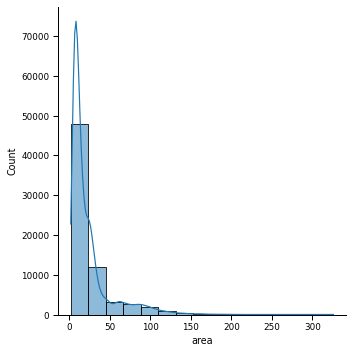

In [142]:
sns.displot(data = scbi_2019_site, x='area', kde=True, bins=15)

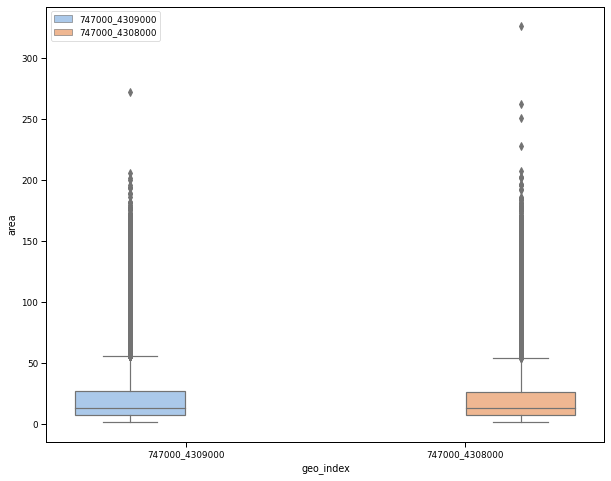

In [143]:
plt.figure(figsize=(10,8))
sns.boxplot(x='geo_index', y='area', data=scbi_2019_site, hue='geo_index', palette='pastel')
#move legend
plt.legend(loc=0)

In [144]:
scbi_2019_site.area.describe()

count    68794.0000000
mean        23.3648001
std         25.9933517
min          1.8700000
25%          7.8000000
50%         13.2600000
75%         26.5200000
max        325.7800000
Name: area, dtype: float64

#__observation:__
#We can see that the area for 75% of trees fall in the range of 0 to 26.52 square meters. 

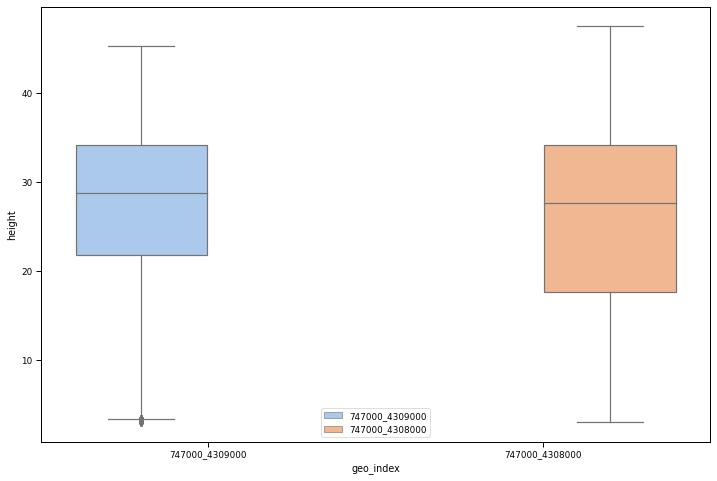

In [145]:
plt.figure(figsize=(12,8))
sns.boxplot(x='geo_index', y='height', data=scbi_2019_site, hue='geo_index', palette='pastel')
#move legend
plt.legend(loc=8)

__Observation:__
We see from the above plot that the majority of the trees have a height between 20 and 40 meters.

__Create new 2019_UTM_X and 2019_UTM_Y for 2019 NEON Crown dataset__

In [146]:
def avgUTM(UTM1,UTM2):
    '''
    average of two UTM Coodrinates
    '''
    return (UTM1+UTM2)/2

# compute and create Center_X_2019 UTM coortinate column
scbi_2019_site = scbi_2019_site.assign(UTM_2019_X=lambda x: avgUTM(x['left'], x['right']))

# compute and create Center_Y_2019 UTM coortinate column
scbi_2019_site = scbi_2019_site.assign(UTM_2019_Y=lambda x: avgUTM(x['bottom'], x['top']))

scbi_2019_site.head(5)

,left,bottom,right,top,score,height,area,geo_index,id,UTM_2019_X,UTM_2019_Y
47049,747574.9,4309754.2,747583.3,4309762.2,0.8544066,22.3610999,67.20,747000_4309000,2317c6a9-6fd1-4254-9aae-c33a8b6737cd,747579.10,4309758.20
47050,747213.4,4309450.4,747219.9,4309457.9,0.8523655,16.3809994,48.75,747000_4309000,f53c0ff5-a8b4-4784-b80d-bd425f772210,747216.65,4309454.15
47051,747291.6,4309813.3,747300.9,4309822.2,0.8437399,26.8459995,82.77,747000_4309000,a9708afa-0f30-40bf-81c1-5810cc7a0b40,747296.25,4309817.75
47052,747289.4,4309752.5,747297.9,4309762.7,0.8405172,31.3351009,86.70,747000_4309000,0ab87b28-4a89-45db-9bd4-7d76e9317495,747293.65,4309757.60
47053,747175.7,4309206.8,747188.7,4309221.3,0.8331666,19.6608008,188.50,747000_4309000,1613e7f6-038f-4540-ba74-8485e43defce,747182.20,4309214.05


### Calculating Euclidean Distance between UTM coordinates of the SCBI 2018 census dataset and 2018 NEON Tree Crowns AOP dataset

In [147]:
def euclidean_distance(point1, point2):
    '''
    compute euclidean distance between two points
    '''
    ed= np.linalg.norm(point1 - point2)
    return ed

In [148]:
def compute_euclidean_distance(utm_2018_and_2019_df):
    '''
    compute euclidean distance between UTM coordinates of 2018 and 2019 dataset
    '''
    # create an empty array
    ed = []
    
    # iterate rows of the dataset using itertuples
    for row_tupple in utm_2018_and_2019_df.itertuples():
        
        # compute euclidean distance between for a tree 2018 UTM coorinates with all the 2019 dataset UTM coordinates
        ecd = euclidean_distance(np.array((row_tupple.UTM_2018_X, row_tupple.UTM_2018_Y)), 
            np.array((row_tupple.UTM_2019_X, row_tupple.UTM_2019_Y)))
        
        #append the eucliedian distance to 2019 dataset
        ed.append(ecd)
    
    #append the array as new columns 
    utm_2018_and_2019_df['euclidean_dist'] = ed
    
    return utm_2018_and_2019_df

__Matching Algorithm__

- The merging Algorithm takes the  stem_diameter_filter, tree_height_filter, geo_index, scbi_2018, and neon_2019 datasets.
- All trees with stem_diamter <= stem_diameter_filter in cms are filtered from the scbi 2018 census dataset.
- All trees with height <= tree_height_filter in meters are filtered from  the 2019Neon crown  dataset
- First, from the Bounding Box UTM coordinates in the 2019 dataset (left, bottom, top, and right features), we created a center point X and Y coordinates represented by UTM_2019_B and UTM_2019_Y features.
- The SCBI 2018 census dataset has tree-specific UTM coordinates represented as UTM_2018_X, UTM_2018_Y. 
- Then we computed Euclidean distance for a tree in the 2018 dataset to all the trees in the 2019 dataset and then selected the top 5 matched trees by the shortest distance between tree centers' in the 2018 and 2019 UTM coordinates.
- The final merged dataset has 5 top matches from the 2019 Neon Crown dataset for every tree in the 2018 SCBI census dataset.
- Then group the merged dataset by the UUID feature (created for the 2019 dataset), then sort by euclidean distance in ascending order.
- Then group the merged dataset by the tree_id feature (created for the 2019 dataset), then sort by euclidean distance in ascending order.
- Select the first tree with the shortest distance and purge the remaining trees with the same UUID from the dataset.
- Each observation in the final merged dataset matches best of the top 5 matches by shortest Euclidean distance between the centers of trees in the 2018 and 2019 datasets.

In [149]:
def match_and_merge(geo_index, scbi_2018, neon_2019_subset, stem_diameter_filter = 10, tree_hight_filter = 10):
    '''
        merge 2018 SCBI census dataset and 2019 NEOW Crown dataset of trees & create a new dataset with features -
    '''
    
    #filter data by geo_index 
    df_1 = scbi_2018[scbi_2018['geo_index'] == geo_index].head(10)
    
    # filter out the smallest trees from 2018 dataset by dbh
    df_1 = df_1[df_1['stem_diameter'] > stem_diameter_filter]
    
    print(f"2018 SCBI dataset shape {df_1.shape}")
    
    #filter data by geo_index 
    df_2 = neon_2019_subset[neon_2019_subset['geo_index'] == geo_index]
    
    # filter out the smallest trees from 2019 dataset by dbh
    df_2 = df_2[df_2['height'] > tree_hight_filter]
    
    print(f"2019 Neon crown dataset shape {df_2.shape}")
    
    #create and empty dataframe object
    matched_df = pd.DataFrame(columns =[
        'tree_id', 'matched_tree_id', 'stem_id','species', 'stem_diameter', 'point_of_measure', 'score', 'height', 'area' , 'UTM_2018_X', 'UTM_2018_Y', 
        'UTM_2019_X', 'UTM_2019_Y', 'euclidean_dist', 'left','bottom', 'right', 'top', 'tree_status', 'census_codes',
    ])
    
    #for every tree in df1 match the nearest tree by euclidian distance
    for irow in df_1.itertuples():
        # copy 2018 tree dataset to 2019 ds
        df_2 = df_2.assign(UTM_2018_X = irow.UTM_2018_X)
        df_2 = df_2.assign(UTM_2018_Y = irow.UTM_2018_Y)
        
        # compute euclidian distance from tree in 2018 dataset
        df_2 = compute_euclidean_distance(df_2)
        
        top5_matched_trees = df_2.sort_values(by = 'euclidean_dist', ascending = True).head(5)
        
        top5_trees_df = pd.DataFrame(columns =[
        'tree_id', 'matched_tree_id', 'stem_id','species', 'stem_diameter', 'point_of_measure', 'score', 'height', 'area' , 'UTM_2018_X', 'UTM_2018_Y', 
        'UTM_2019_X', 'UTM_2019_Y', 'euclidean_dist', 'left','bottom', 'right', 'top', 'tree_status', 'census_codes',
        ])
        

        for row in top5_matched_trees.itertuples():
            
            top5_trees_df = top5_trees_df.append({'tree_id' : irow.tree_id,
                                        'matched_tree_id' : row.id,
                                        'stem_id' : irow.stem_id,
                                        'species' : irow.species,
                                        'stem_diameter' : irow.stem_diameter,
                                        'point_of_measure': irow.point_of_measure,
                                        'score': row.score, #matched_tree['score'].iloc[0],
                                        'height': row.height, #matched_tree['height'].iloc[0],
                                        'area': row.area, #matched_tree['area'].iloc[0],
                                        'UTM_2018_X': irow.UTM_2018_X,
                                        'UTM_2018_Y': irow.UTM_2018_Y,
                                        'UTM_2019_X': row.UTM_2019_X, #matched_tree['UTM_2019_X'].iloc[0],
                                        'UTM_2019_Y': row.UTM_2019_X,#matched_tree['UTM_2019_Y'].iloc[0],
                                        'euclidean_dist': row.euclidean_dist, #matched_tree['euclidean_dist'].iloc[0],
                                        'left': row.left, #matched_tree['left'].iloc[0],
                                        'bottom': row.bottom, # matched_tree['bottom'].iloc[0],
                                        'right': row.right, #matched_tree['right'].iloc[0],
                                        'top': row.top, #matched_tree['top'].iloc[0],
                                        'tree_status': irow.tree_status,
                                        'census_codes': irow.census_codes
                                       }, ignore_index=True)
        
        matched_df = matched_df.append(top5_trees_df)
    
        
    return matched_df

In [150]:
def filter_unique_match_by_ecd(matched_df):
    scbi_2018_neon_2019_merged_df = pd.DataFrame(columns =['tree_id', 'matched_tree_id', 'stem_id','species', 'stem_diameter', 'point_of_measure',
                                                           'score', 'height', 'area' , 'UTM_2018_X', 'UTM_2018_Y', 'UTM_2019_X', 'UTM_2019_Y', 
                                                           'euclidean_dist', 'left','bottom', 'right', 'top', 'tree_status', 'census_codes' ])
     
    filterd_scbi_2018_neon_2019_merged_df = pd.DataFrame(columns =['tree_id', 'matched_tree_id', 'stem_id','species', 'stem_diameter', 'point_of_measure',
                                                           'score', 'height', 'area' , 'UTM_2018_X', 'UTM_2018_Y', 'UTM_2019_X', 'UTM_2019_Y', 
                                                           'euclidean_dist', 'left','bottom', 'right', 'top', 'tree_status', 'census_codes' ])
          
    # unique matched_tree_ids
    unique_matched_trees = matched_df.matched_tree_id.unique()
    
    for m_tree_id in unique_matched_trees:

        temp_df = matched_df[matched_df['matched_tree_id'] == m_tree_id].sort_values(by='euclidean_dist', ascending=True).head(1)
        
        #print(f"tree_id: {temp_df['tree_id']} matched_tree_id: {temp_df['matched_tree_id']} euclidean_id: {temp_df['euclidean_dist']}")
        scbi_2018_neon_2019_merged_df = scbi_2018_neon_2019_merged_df.append(temp_df.head(1))
        
    
    # unique tree_ids
    unique_tree_ids = matched_df.tree_id.unique()
    
    for tree_id in unique_tree_ids:
        temp_df = matched_df[matched_df['tree_id'] == tree_id].sort_values(by='euclidean_dist', ascending=True).head(1)
        filterd_scbi_2018_neon_2019_merged_df = filterd_scbi_2018_neon_2019_merged_df.append(temp_df)
    return filterd_scbi_2018_neon_2019_merged_df.reset_index(drop=True)
        

In [151]:
matched_2018_s1 = match_and_merge('747000_4308000', scbi_2018, scbi_2019_site)
matched_2018_s1 = filter_unique_match_by_ecd(matched_2018_s1)

2018 SCBI dataset shape (10, 12)
2019 Neon crown dataset shape (29771, 11)


In [152]:
matched_2018_s2 = match_and_merge('747000_4309000', scbi_2018, scbi_2019_site)
matched_2018_s2 = filter_unique_match_by_ecd(matched_2018_s2)

2018 SCBI dataset shape (10, 12)
2019 Neon crown dataset shape (33358, 11)


In [153]:
merged_and_matched_trees_2018_2019_df = pd.concat([matched_2018_s1, matched_2018_s2], ignore_index=True)

In [154]:
merged_and_matched_trees_2018_2019_df.to_csv('data/merged_and_matched_trees.csv')

In [155]:
merged_and_matched_trees_2018_2019_df.shape

(20, 20)

## Conclusion:

As part of the Exploratory data analysis, We have done extensive cleaning and data manipulation to merge the ground and aerial data by the tree to create a suitable dataset with a rich set of variables to apply Bayesian machine learning techniques to meet our course project's overarching goal. We used a sample of data obtained from a portion of our merged (aerial/ground) data to prototype our estimative models.

# 
